In [34]:
import os

subj = "Subj3"
exp = "exp_intermediate"
print_obj = 7
os.makedirs(f"{subj}/{exp}", exist_ok = True)

### Imports

In [35]:
%load_ext autoreload
%autoreload 2

import mne
import pandas
import gtda.plotting
import gtda.homology
import gtda.diagrams
import gtda.time_series

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Epochs

Reading d:\HSE\year-3\HSE\CourseProject\Subj3\src\epochs_filt_rr-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1180 matching events found
No baseline correction applied
0 projection items activated
No projector specified for this dataset. Please consider the method self.add_proj.


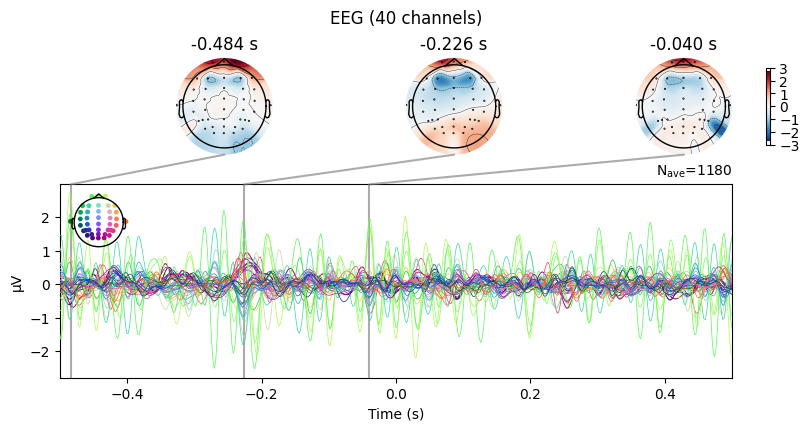

In [36]:
epochs = mne.read_epochs(f"{subj}/src/epochs_filt_rr-epo.fif")
g = epochs.average().plot_joint().savefig(f"{subj}/{exp}/eeg.svg")

### TakensEmbedding

In [37]:
embedder = gtda.time_series.TakensEmbedding(dimension = 10)
points = embedder.fit_transform(epochs.get_data(copy = True))
print(points.shape)

(1180, 492, 400)


In [38]:
plot = gtda.plotting.plot_point_cloud(points[print_obj])
display(plot)
plot.write_image(file = f"{subj}/{exp}/point_cloud.svg", format = "svg")

### VietorisRipsPersistence

In [39]:
persistence = gtda.homology.VietorisRipsPersistence(homology_dimensions = [0, 1, 2], n_jobs = -1)
raw_diagram = persistence.fit_transform(points)
print(raw_diagram.shape)

(1180, 1428, 3)


In [40]:
plot = gtda.plotting.plot_diagram(raw_diagram[8])
display(plot)
plot.write_image(file = f"{subj}/{exp}/raw_diagram.svg", format = "svg")

### Scaler & Filtering

In [41]:
scaler = gtda.diagrams.Scaler()
filtering = gtda.diagrams.Filtering()
diagram = filtering.fit_transform(scaler.fit_transform(raw_diagram))
diagram = scaler.fit_transform(raw_diagram)
print(diagram.shape)
gtda.plotting.plot_diagram(diagram[print_obj])

(1180, 1428, 3)


In [42]:
scaler = gtda.diagrams.Scaler()
filtering = gtda.diagrams.Filtering()
diagram = filtering.fit_transform(scaler.fit_transform(raw_diagram))
print(diagram.shape)

(1180, 1268, 3)


In [43]:
plot = gtda.plotting.plot_diagram(diagram[print_obj])
display(plot)
plot.write_image(file = f"{subj}/{exp}/diagram.svg", format = "svg")

### PersistenceEntropy

In [44]:
entropy = gtda.diagrams.PersistenceEntropy()
features = entropy.fit_transform(diagram)
print(features.shape)
print(features[print_obj])

(1180, 3)
[8.8806832  7.39457826 5.69644319]


### Save

In [45]:
df = pandas.DataFrame(features)
df.to_feather(f"{subj}/{exp}/features.feather")
df

,0,1,2
0,8.881884,7.251512,5.909041
1,8.860589,7.468439,5.801415
2,8.896484,6.967943,6.124762
3,8.864323,7.103611,5.996599
4,8.904731,6.222518,4.940977
...,...,...,...
1175,8.866312,7.703486,6.626842
1176,8.884096,8.149533,6.827143
1177,8.858395,7.878241,5.668984
1178,8.885123,8.021604,6.460913
